# Ex3

Calcule a imagem (I+I’+I’’) cujos valores devem estar normalizados no intervalo [0,255].

In [ ]:
import numpy as np
from skimage import data
from skimage.transform import resize
import matplotlib.pyplot as plt

In [ ]:
# transform a rgb to gray
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

In [ ]:
# scale a image with given height and width
def scale(im, nH, nW):
  _height = len(im)
  _width = len(im[0]) 
  _list = [[ im[int(_height * r / nH)][int(_width * c / nW)]  
             for c in range(nW)] for r in range(nH)]
  return np.asarray(_list)

In [ ]:
# get test image
image_aux = data.camera()

In [ ]:
# scale to 256x256
image1 = scale(image_aux, 256, 256)

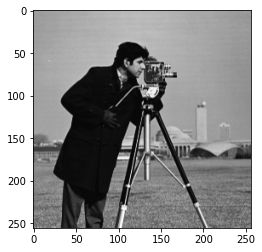

In [ ]:
# show image
plt.imshow(image1, cmap='gray')

In [ ]:
# show image min and max
image1.min(), image1.max()

(0, 255)

In [ ]:
# get image width and height
width, height = image1.shape[0], image1.shape[1]

In [ ]:
# generate a image with f(0,y)=0 e f(M,y)=255
image2 = np.ones(image1.shape, np.uint8)
for y in range(0, height):
  for x in range(0, width):
    intensity = image1[x][y]
    intensity_new = y
    image2[x][y] = intensity_new

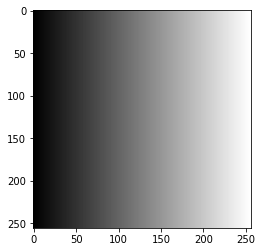

In [ ]:
# show new image
plt.imshow(image2, cmap='gray')

In [ ]:
# generate a image with f(x,0)=0 and f(x,N)=255
image3 = np.ones(image1.shape, np.uint8)
for y in range(0, height):
  for x in range(0, width):
    intensity = image1[x][y]
    intensity_new = x
    image3[x][y] = intensity_new

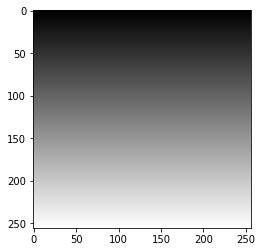

In [ ]:
# show new image
plt.imshow(image3, cmap='gray')

In [ ]:
# sum images
image4 = np.ones(image1.shape, np.uint64)
for y in range(0, height):
  for x in range(0, width):
    intensity = (int(image1[x][y]) +  int(image2[x][y]) +  int(image3[x][y]))
    image4[x][y] = intensity

In [ ]:
# show new image min and max
image4.min(), image4.max()

(143, 695)

In [ ]:
# normalize final image 
image4 = (image4*255.0)/image4.max()

In [ ]:
# show final image min and max
image4.min(), image4.max()

(52.46762589928058, 255.0)

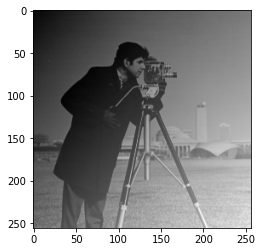

In [ ]:
# show final image
plt.imshow(image4, cmap='gray')